In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fuel Economy Across Global Car-Producing Regions

### Group Members

Joshlyn Jamerson, Bob Ebend, Travis Lindeman, Austin Youngblood

This notebook presents an analysis of a dataset containing information on various vehicles manufactured from 1970 through 1982. The dataset includes features such as miles per gallon (mpg), the number of cylinders, horsepower, weight, acceleration, model year, country of origin, and car description.

In [2]:
# Load the dataset
df = pd.read_csv('../stats_case_study/data/cars.csv')

# Map the origin to the corresponding region
df['Region'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Asia'})

# Display the first few rows of the dataframe
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,Region
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,USA


## Exploratory Data Analysis (EDA)
MPG - Numerical      
Cylinders - Numerical         
Displacemnt - Numerical        
Horsepower - Numerical  
Weight - Numerical                  
Accelartion - Numerical                
Model - Numerical           
Origin - Categorical                
Car Name - Text       

The dataset showed that we were looking at 398 rows of data across 9 columns

C:\Users\joshy\AppData\Local\Temp\ipykernel_7252\1987097705.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


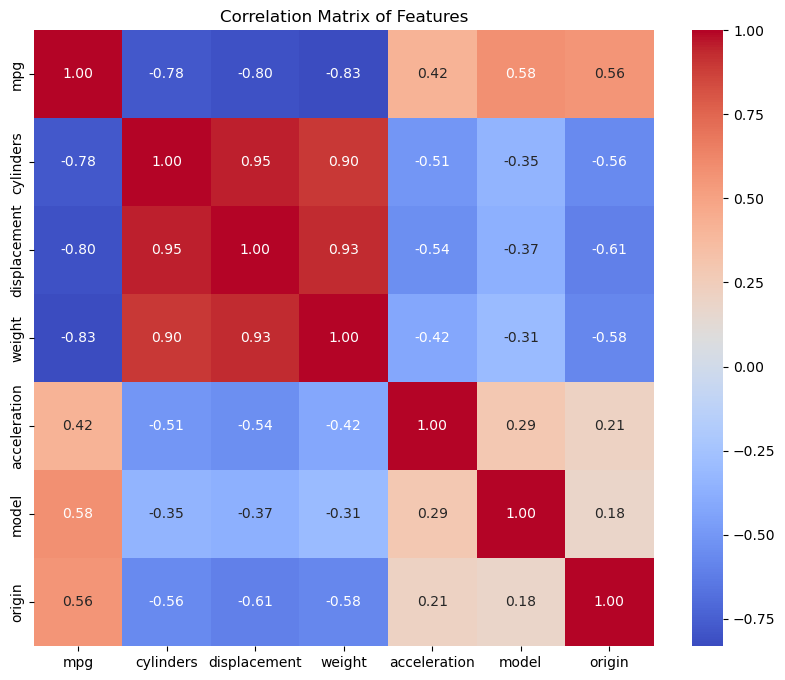

In [4]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model'}>],
       [<Axes: title={'center': 'origin'}>, <Axes: >, <Axes: >]],
      dtype=object)

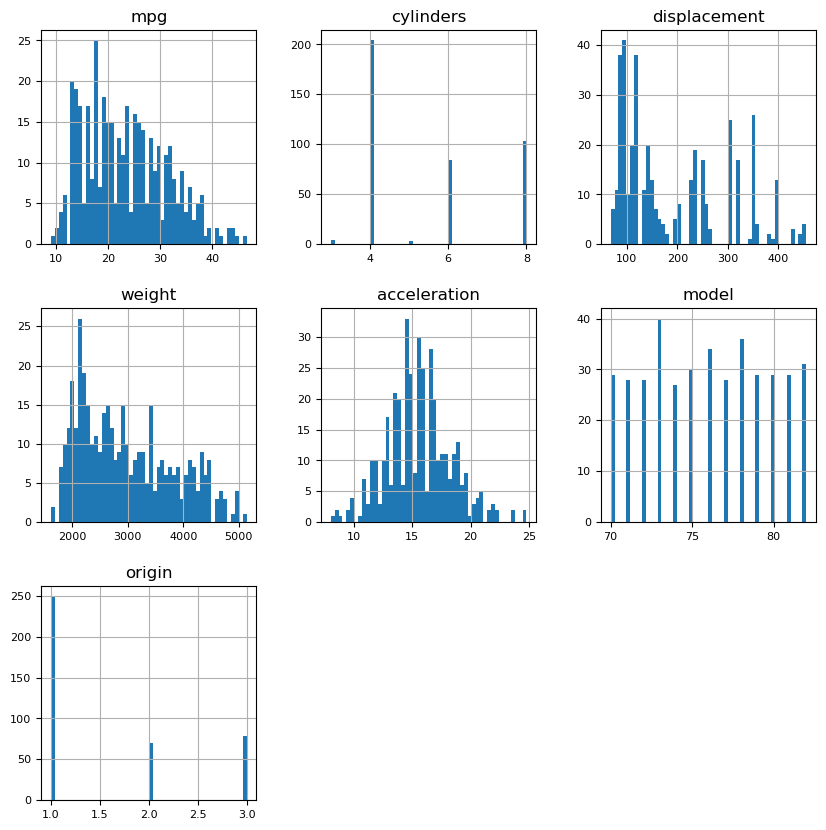

In [3]:
# Visualize the distributions of each feature
df.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

In [35]:
# Generate descriptive statistics for the 'mpg' variable
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Before we perform the hypothesis test, let's first explore the data to understand its characteristics. This will involve generating descriptive statistics and visualizing the distributions of the variables of interest.

Raw numbers for potential questions:


count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

We'll focus on the 'mpg' and 'origin' variables, as these are the variables relevant to our hypothesis. The 'mpg' variable is a numerical variable that represents the miles per gallon of the vehicles, and the 'origin' variable is a categorical variable that represents the region where the vehicles were manufactured.

## Statistical Hypothesis Testing

### These are the steps we followed for our hypothesis testing

1. **State the hypotheses.** 

2. **Formulate an analysis plan.** 

3. **Analyze sample data.** 

4. **Interpret the results.** 

These are the steps we followed to establish and test our hypothesis. 

The hypothesis is not only the driving factor behind our study, but also the mathematical definition that provides the formula's backbone.

We will perform a one-way ANOVA test to determine whether there are significant differences in the mean mpg for cars from different regions.

For this analysis, the significance level is defined as 0.05. We analyzed the sample data with the test statistic as the F statistic, which follows an F distribution which we then plugged into Cohen's test for d. All of which facilitated the completion of the ANOVA test and allowed us to make a strong argument for our conclusion. 


## Hypotheses

Null Hypothesis ($H_0$): The average fuel economy for cars from all regions (USA, Europe, and Asia) are equal.

$$
\mu_{\text{USA}} = \mu_{\text{Europe}} = \mu_{\text{Asia}}
$$

Alternate Hypothesis ($H_a$): At least one region has a different average fuel economy from the others.

$$
\mu_{\text{USA}} \neq \mu_{\text{Europe}} \neq \mu_{\text{Asia}}
$$

In plain language, this slide says that our group posits that there is a relationship between fuel economy and the region where the vehicle was built.

In the following sections, we will perform an exploratory data analysis, followed by a statistical test (one-way ANOVA) to test this hypothesis.

In [38]:
n = len(df) # We will also need n for each region later

alpha = 0.05

sigma = np.std(df, ddof=1) # This will need to be calculated for each region as well

se = sigma / np.sqrt(n) # Same as above

C:\Users\austi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


# Analyze Sample Data

## Dependent Variable

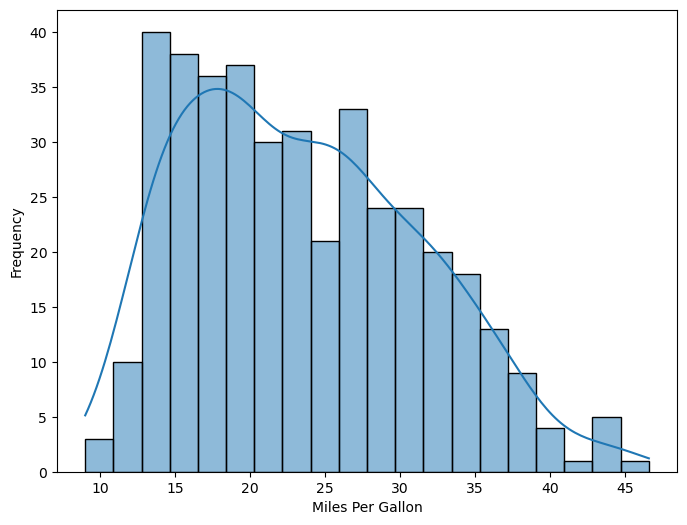

In [36]:
# Generate a histogram for the 'mpg' variable
plt.figure(figsize=(8, 6))
sns.histplot(df['mpg'], kde=True, bins=20)
# plt.title('Histogram of MPG')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.show()

## Independent Variables

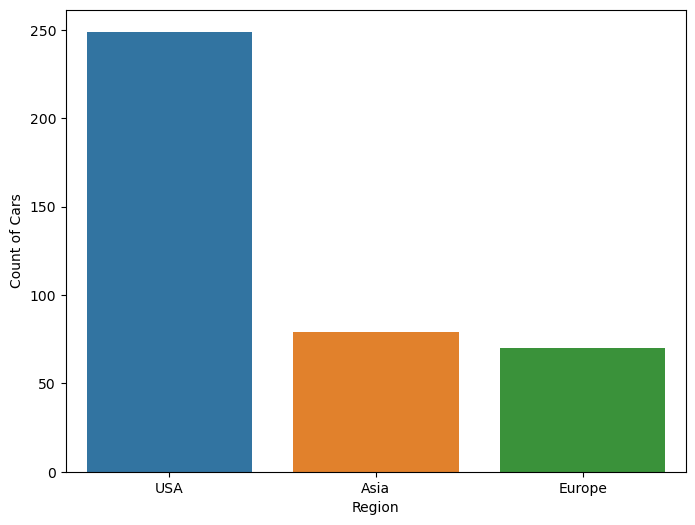

In [44]:
plt.figure(figsize=(8, 6))
df[df['origin'] == 1]['mpg'].hist(alpha=0.7, label='USA', bins=30)
df[df['origin'] == 2]['mpg'].hist(alpha=0.7, label='Europe', bins=30)
df[df['origin'] == 3]['mpg'].hist(alpha=0.7, label='Asia', bins=30)
plt.title('Distribution of Fuel Efficiency by Region of Origin', fontsize=16)
plt.xlabel('Fuel Efficiency (MPG)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Fit the model using a formula string
model = smf.ols('mpg ~ C(origin)', data=df).fit()

# Perform the one-way ANOVA test
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
anova_result

,sum_sq,df,F,PR(>F)
C(origin),8072.820662,2.0,98.541795,1.915486e-35
Residual,16179.754815,395.0,NaN,NaN


## Deeper Analysis

# Interpretation of Results and Conclusion
F statistic: 98.54

p value: 1.91e-35

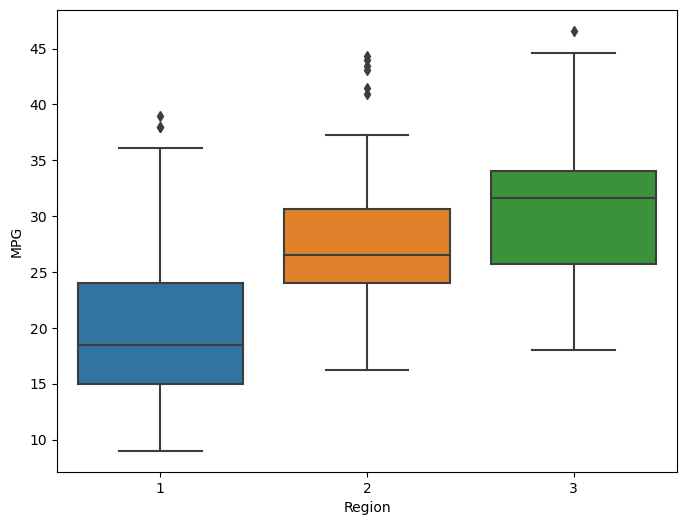

In [43]:
# Generate box plots of the mpg values for each region
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='mpg', data=df)
# plt.title('MPG by Region')
plt.xlabel('Region')
plt.ylabel('MPG')
plt.show()

As Joshlyn spoke about earlier, we used an ANOVA test because we had more than one independent variable. Within that test, we used Cohen's d test to establish the most appropriate variation to compare all three variables against. By using the largest variance from zero, we knew we could confidently proceed with an analysis which encapsulated all of the variables. 

The one-way ANOVA test results are presented on the slide: The F statistic is 98.54 and the P-value is extremely small (almost zero). Since this p-value is well below our max threshold of .05, we can reject the null hypothesis by this alone. 

These box plots further represent the test results from our data. The box represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). The line inside the box is the median (50th percentile), and the whiskers represent the range of values within 1.5 times the IQR from the first and third quartiles. Outliers are represented as individual points outside the whiskers. 

From the box plots, we can see that cars from Asia and Europe tend to have higher mpg values compared to cars from the USA. This visual representation supports our earlier conclusion from the one-way ANOVA test that the region where a car is made has a significant effect on its fuel efficiency. If the opposite were true, we would expect to see thes box plots at more similar elevations and with more similar features than they do have. 